# Galaxies and the large-scale structure of the Universe

<font color='green'>This notebook contains an example activity investigating the large-scale structure of the Universe, created by Rita Tojeiro for an introductory astronomy course (AS1001) at University of St Andrews in October 2017. You are welcome to use it as is, or to use it as a starting point for developing your own activities.
    
Instructions to you the instructor are in green text, while instructions to your students are in black.

The student version of this notebook includes only the student instructions.</font>

# Introduction


In this Notebook, you will use real astronomy data to explore the relationship between galaxy properties and the large-scale structure of the Universe. 

In the end, you should have found an answer to the following questions:

* How are galaxies spatially distributed in the Universe?
* Are galaxies all the same colour?
* Are galaxies all the same shape?
* How are galaxies' colours and shapes related to their spacial distribution?


## SDSS and SciServer

You will answer the above questions yourself, by exploring the largest astronomical dataset in the world - the Sloan Digital Sky Survey (www.sdss.org). You will interact directly with the data by running Python commands inside this online notebook in the SciServer virtual computing environment. That means you can work with the largest astronomical dataset in the world using only your web browser.


If you're reading this, you have already followed the instructions to get an account on SciServer, and have uploaded this notebook. These exercise assume that you are familiar with basic Python, dataframe manipulation, and matplotlib commands.


## Part 1: a map of the Universe

<font color='green'>In this section, students make a simple map of the Universe, with a dot representing each galaxy. If students already have SciServer accounts and know how to open and run a notebook, and if they have brought computers to lecture, Part 1 can be done as an in-class activity in about 10 minutes. It can also be implemented as a short homework activity.</font>

In this section, you will get the positions of thousands of galaxies and plot them to make a map of the Universe.

### Import libraries and apply settings

Before we do anything else, we need to tell Python to import the libaries it will need.

In [34]:
# # Import Python libraries to work with SciServer
import SciServer.CasJobs as CasJobs # query with CasJobs
import SciServer.SkyServer as SkyServer   # show individual objects and generate thumbnail images through SkyServer
#print('SciServer libraries imported')

# # Import other libraries for use in this notebook.
import numpy as np                  # standard Python lib for math ops
# from scipy.misc import imsave       # save images as files
import pandas                       # data manipulation package
import matplotlib.pyplot as plt     # another graphing package
# import os                           # manage local files in your Compute containers
#print('Supporting libraries imported')

# #import astroML
# #from astroML.datasets import fetch_sdss_spectrum
# from astropy.io import ascii

# # Apply some special settings to the imported libraries
# # ensure columns get written completely in notebook
pandas.set_option('display.max_colwidth', None)
# # do *not* show python warnings 
# import warnings
#warnings.filterwarnings('ignore')
print('Libraries imported and settings applied!')

Libraries imported and settings applied!


### Querying the SDSS database

The SDSS stores its data in an online database. You can communicate with the database by sending "queries" written in Structured Query Language (SQL). For each query command, the database returns an answer. Usually, the answer will be a subsample of the original database, though SQL can operate on the data very effectively too. 

In this tutorial, we will submit queries to the SDSS database to gather the information that we need, and then we will use python to operate on, manipulate, and vizualise that data.

An extensive tutorial on how to query the SDSS database is provided here: http://skyserver.sdss.org/dr16/en/help/howto/search/searchhowtohome.aspx 

In short, every SQL command consists of three blocks: 
- The **SELECT** block: it defines the quantities that you want your query to return.
- The **FROM** block: it defines which tables of the database you want SQL to look in.
- The **WHERE** block: it defines any constraints on the data that you want to impose.

To make your map of the Universe (Part 1 of this activity), you won't have to write SQL queries from scratch, only execute commands that are already written for you.

<font color='green'>The code cell below searches the latest data release of the Sloan Digital Sky Survey, Data Release 16 (DR16), for galaxies appropriate for the large-scale structure plot.

This query finds all galaxies in the region of sky between RA 100 and 250 degrees, with redshift between 0.02 and 0.5, g-band magnitude brighter than 17, and size (petror90_r) greater than 10 arcseconds.

<br /><em>Note: we have kept the print statement simple so students can easily understand what it means, but the output can be made clearer by using this command instead:</em>

&nbsp;&nbsp;&nbsp;&nbsp;<code>print("SQL query returned " + str(len(all_gals))+ " galaxies")</code></font>

The code cell below searches the latest SDSS data release and returns information on a sample of galaxies.

**Click inside the code cell and click Run to see how many galaxies the query has found.**

In [1]:
query="""
SELECT p.objId,p.ra,p.dec,p.petror90_r, p.expAB_r,
    p.dered_u as u, p.dered_g as g, p.dered_r as r, p.dered_i as i, 
    s.z, s.plate, s.mjd, s.fiberid
FROM galaxy AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.petror90_r > 10
  and p.ra between 100 and 250
  and s.z between 0.02 and 0.5
  and p.g < 17
"""

print('Submitting query...')
all_gals = CasJobs.executeQuery(query, "dr16")

print("SQL query returned " + str(len(all_gals))+ " galaxies")
#print("SQL query returned {0:,.0f} galaxies!".format(len(all_gals)))

Submitting query...


NameError: name 'CasJobs' is not defined

The dataframe that is returned, which we named all_gals, holds the following quantities (in columns) for each galaxy:

- ra = Right Ascencion coordinate in degrees
- dec = Declination coordinate in degrees
- petror90_r = Radius enclosing 90% of the pertrosian flux in arcseconds. i.e., size of the galaxy in the sky.
- dered_u, dered_g, dered_r, dered_i, dered_z = Magnitudes in 5 optical filters, from the blue to the red, after subtracting the attenuation due to the Milky Way.
- z = Redshift of the galaxy
- plate = Plate number (SDSS used alluminium plates with drilled holes for positioning optical fibers).
- mjd = Date of the observation
- fiberid = Number of the fiber in a given plate. Plates have between 640 and 1000 fibers.

Let's have a look at the first 10 elements of the returned table (dataframe) by running the Code cell below:

In [39]:
all_gals[0:10]

,objId,ra,dec,petror90_r,expAB_r,u,g,r,i,z,plate,mjd,fiberid
0,1237650761316368451,179.002400,-2.720055,29.90478,0.860130,16.59324,15.22027,14.61850,14.33093,0.020307,330,52370,69
1,1237650761316630665,179.547287,-2.824468,13.19722,0.657813,18.24962,16.37590,15.45398,15.01798,0.080837,331,52368,267
2,1237650761317154966,180.794537,-2.875998,14.52145,0.754407,17.10954,15.14576,14.27486,13.84731,0.052211,331,52368,112
3,1237650761318203506,183.201106,-2.724620,16.49348,0.577123,16.82479,15.13233,14.29979,13.86673,0.038072,332,52367,105
4,1237650761318924495,184.897742,-2.830607,10.40758,0.487816,16.72573,15.80091,15.42693,15.24716,0.021523,333,52313,178
5,1237650761320104102,187.573846,-2.781192,12.27688,0.512899,17.78006,16.11366,15.35365,14.95448,0.071384,334,51993,112
6,1237650761320300733,187.989278,-2.866398,17.38497,0.325317,17.14486,16.01053,15.56320,15.34717,0.024349,334,51993,28
7,1237650761321152746,189.951562,-2.796089,13.66831,0.733589,17.46248,15.64403,14.82956,14.43514,0.047938,335,52000,152
8,1237650761322332240,192.676847,-2.825408,10.70972,0.583854,16.57590,15.43610,14.79491,14.40804,0.047116,337,51997,221
9,1237650761322594377,193.224624,-2.841215,12.95675,0.663679,17.49612,15.98385,15.19366,14.77489,0.084437,338,51694,313


## The large scale structure of the Universe 

Now that we have data for thousands of galaxies, let's make a scatterplot of the positions of galaxies. 

Remember to add labels and a title to your plot. Given the large number of points, you might want to use marker='.' and s='1'.

Run the Code cell below to make the scatterplot. 

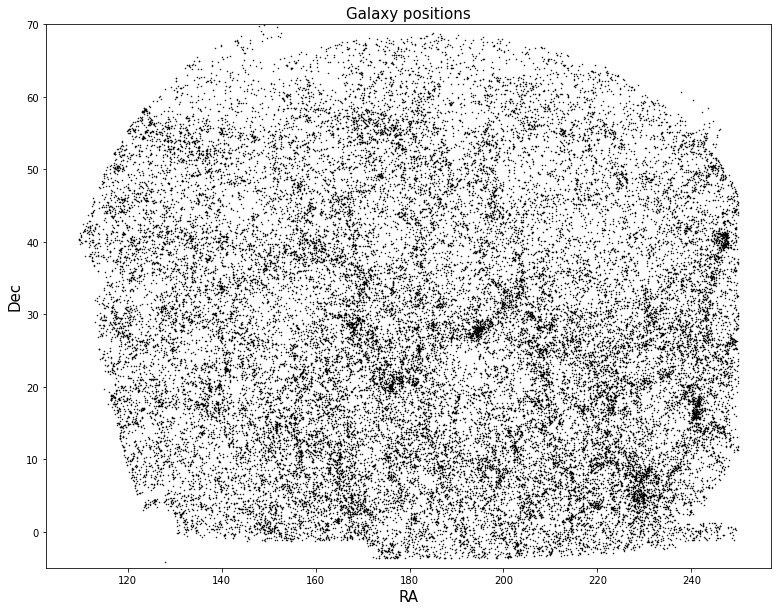

In [40]:
#Possible solution
plt.figure(figsize=(13,10))
plt.scatter(all_gals['ra'], all_gals['dec'], marker='.', color='black',s=1)
plt.xlabel('RA', fontsize=15); plt.ylabel('Dec', fontsize=15)
plt.title('Galaxy positions', fontsize=15)
plt.ylim(-5,70)
plt.show()

### Exercise

What can you tell from the distribution of galaxies? Are they uniformly distributed on the sky? Enter the answer in the textbox below.

type your answer here!

<font color='green'><strong>Possible solution</strong>

Students should note that the spacial distribution isn't uniform on the sky, with some regions showing a higher density of objects.</red>